In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("churn-data-1.csv")

In [13]:
data.shape

(7043, 21)

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

SeniorCitizen       AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
tenure            AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
MonthlyCharges    AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
dtype: object

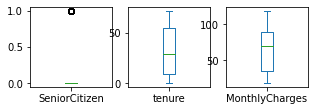

In [19]:
data.plot(kind='box',subplots=True,figsize=(12,12),layout=(7,7))

In [20]:
print(data['tenure'].max())

72


In [21]:
condition = [((data.tenure >= 0)&(data.tenure <= 12)), ((data.tenure > 12)&(data.tenure <= 24)), 
             ((data.tenure > 24)&(data.tenure <= 36)),((data.tenure > 36)&(data.tenure <= 48)),
             ((data.tenure > 48)&(data.tenure <= 60)), (data.tenure > 60)]


choice = [0,1, 2, 3, 4, 5]
data['tenure_range'] = np.select(condition, choice)

In [22]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [23]:
data.index[data['TotalCharges'].str.contains(' ')]

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [24]:
data['TotalCharges']=data['TotalCharges'].replace(' ',)

In [25]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [26]:
data['MonthlyCharges']=np.log1p(data['MonthlyCharges'])
data['TotalCharges']=np.log1p(data['TotalCharges'])

In [27]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,3.429137,3.429137,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,4.059581,7.544597,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,4.004602,4.692723,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),3.768153,7.518471,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,4.272491,5.028148,Yes,0


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

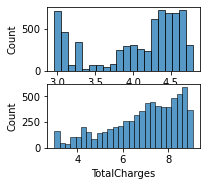

In [28]:
plt.subplot(3, 2, 4)
sns.histplot(x='MonthlyCharges', data=data)

plt.subplot(3, 2, 6)
sns.histplot(x='TotalCharges', data=data)

In [29]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,3.429137,3.429137,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,4.059581,7.544597,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,4.004602,4.692723,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),3.768153,7.518471,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,4.272491,5.028148,1,0


In [30]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,tenure_range,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,3.429137,3.429137,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,4.059581,7.544597,0,2,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,4.004602,4.692723,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,3.768153,7.518471,0,3,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,4.272491,5.028148,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
X = data_dummies.drop(['Churn','tenure'], axis=1)

y = data_dummies['Churn']

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [34]:
scaled=scaler.fit_transform(data_dummies)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,tenure_range,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,3.429137,3.429137,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,4.059581,7.544597,0,2,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,4.004602,4.692723,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,3.768153,7.518471,0,3,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,4.272491,5.028148,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [55]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7090 entries, SeniorCitizen to PaymentMethod_Mailed check
dtypes: float64(2), int32(2), int64(2), uint8(7084)
memory usage: 47.9 MB


In [56]:
data_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_range', 'customerID_0002-ORFBO', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       ...
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object', length=7090)

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X,y=make_classification(n_samples=100,flip_y=0,random_state=1)
print(Counter(y))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50,random_state=1,stratify=y)
print(Counter(y_train))
print(Counter(y_test))


Counter({1: 50, 0: 50})
Counter({0: 25, 1: 25})
Counter({0: 25, 1: 25})


In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score


In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.94

In [38]:
cr=classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.96      0.92      0.94        25

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



C:\Users\akshaya.nambiar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


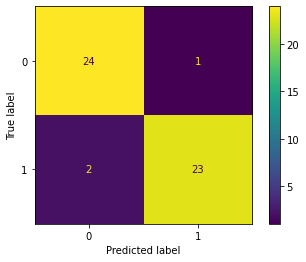

In [39]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

In [40]:
from sklearn.svm import SVC
svc = SVC(probability=True)
model = svc.fit(X_train,y_train)
y_pred_svc = model.predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.94

In [41]:
cr=classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.88      0.94        25

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



C:\Users\akshaya.nambiar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


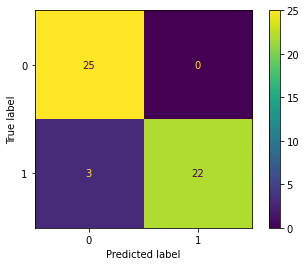

In [42]:
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train,y_train)
y_pred_enrf = model_rf.predict(X_test)
accuracy_score(y_test, y_pred_enrf)

0.98

In [44]:
cr=classification_report(y_test, y_pred_enrf)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



C:\Users\akshaya.nambiar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


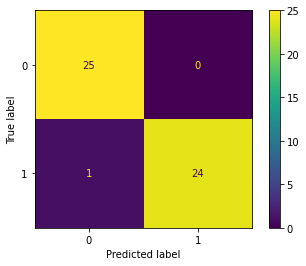

In [45]:
plot_confusion_matrix(model_rf, X_test, y_test)  
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
model_log=logreg_cv.fit(X, y)
  
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best accuracy is {}".format(logreg_cv.best_score_))
    
    

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best accuracy is 0.96


In [47]:
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(),param_grid)
model_svm=grid.fit(X_train,y_train)
print("Tuned SVM Parameters:{}".format(grid.best_params_))
print("Best accuracy is {}".format(grid.score(X_test,y_test)))

Tuned SVM Parameters:{'C': 1, 'degree': 1, 'kernel': 'sigmoid'}
Best accuracy is 0.92


In [48]:
forest = RandomForestClassifier()

# Create the grid parameter:
grid_rf = {'n_estimators': [100, 120, 150],
           'criterion': ['entropy', 'gini'], 
           'max_depth': [None,1,3,5,7,9],
           'max_features': range(1,11),  
           'min_samples_split': range(2, 10),
           'min_samples_leaf': [1,3,5]}
  
# Create the grid:
gs_rf = GridSearchCV(forest, grid_rf, cv=3, n_jobs=-1)

# Fit using grid search:
model_random =gs_rf.fit(X_train, y_train)

# Print best accuracy and best parameters:
print('Best accuracy: %.3f' % gs_rf.best_score_)
print('\nBest params:\n', gs_rf.best_params_)

Best accuracy: 0.980

Best params:
 {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


In [49]:
import pickle

In [50]:
filename='trained_model.sav'

In [51]:
pickle.dump(model_random,open(filename,'wb'))

In [52]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [53]:
result=loaded_model.score(X_test,y_test)

In [54]:
loaded_model.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0])